<a href="https://colab.research.google.com/github/Nithya9404/Naan_mudalvan_GEN_AI/blob/main/Maternal_health_risk_prediction_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/datasets/Maternal Health Risk Data Set.csv')
df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [6]:
df=df.replace({'RiskLevel':{'low risk': 1, 'mid risk': 2, 'high risk': 3}})

In [7]:
df['RiskLevel']

0       3
1       3
2       3
3       3
4       1
       ..
1009    3
1010    3
1011    3
1012    3
1013    2
Name: RiskLevel, Length: 1014, dtype: int64

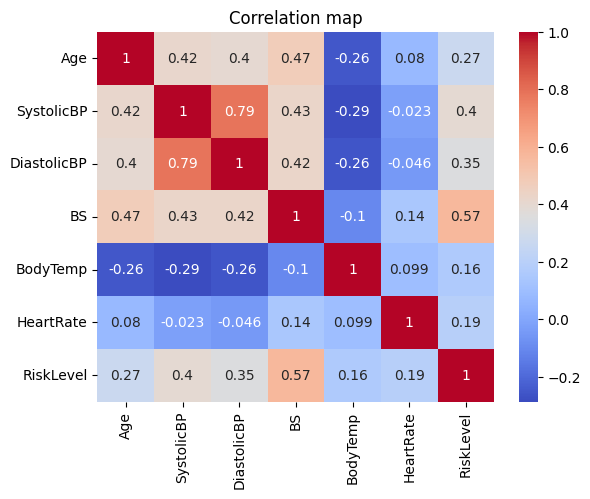

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title('Correlation map')
plt.show()

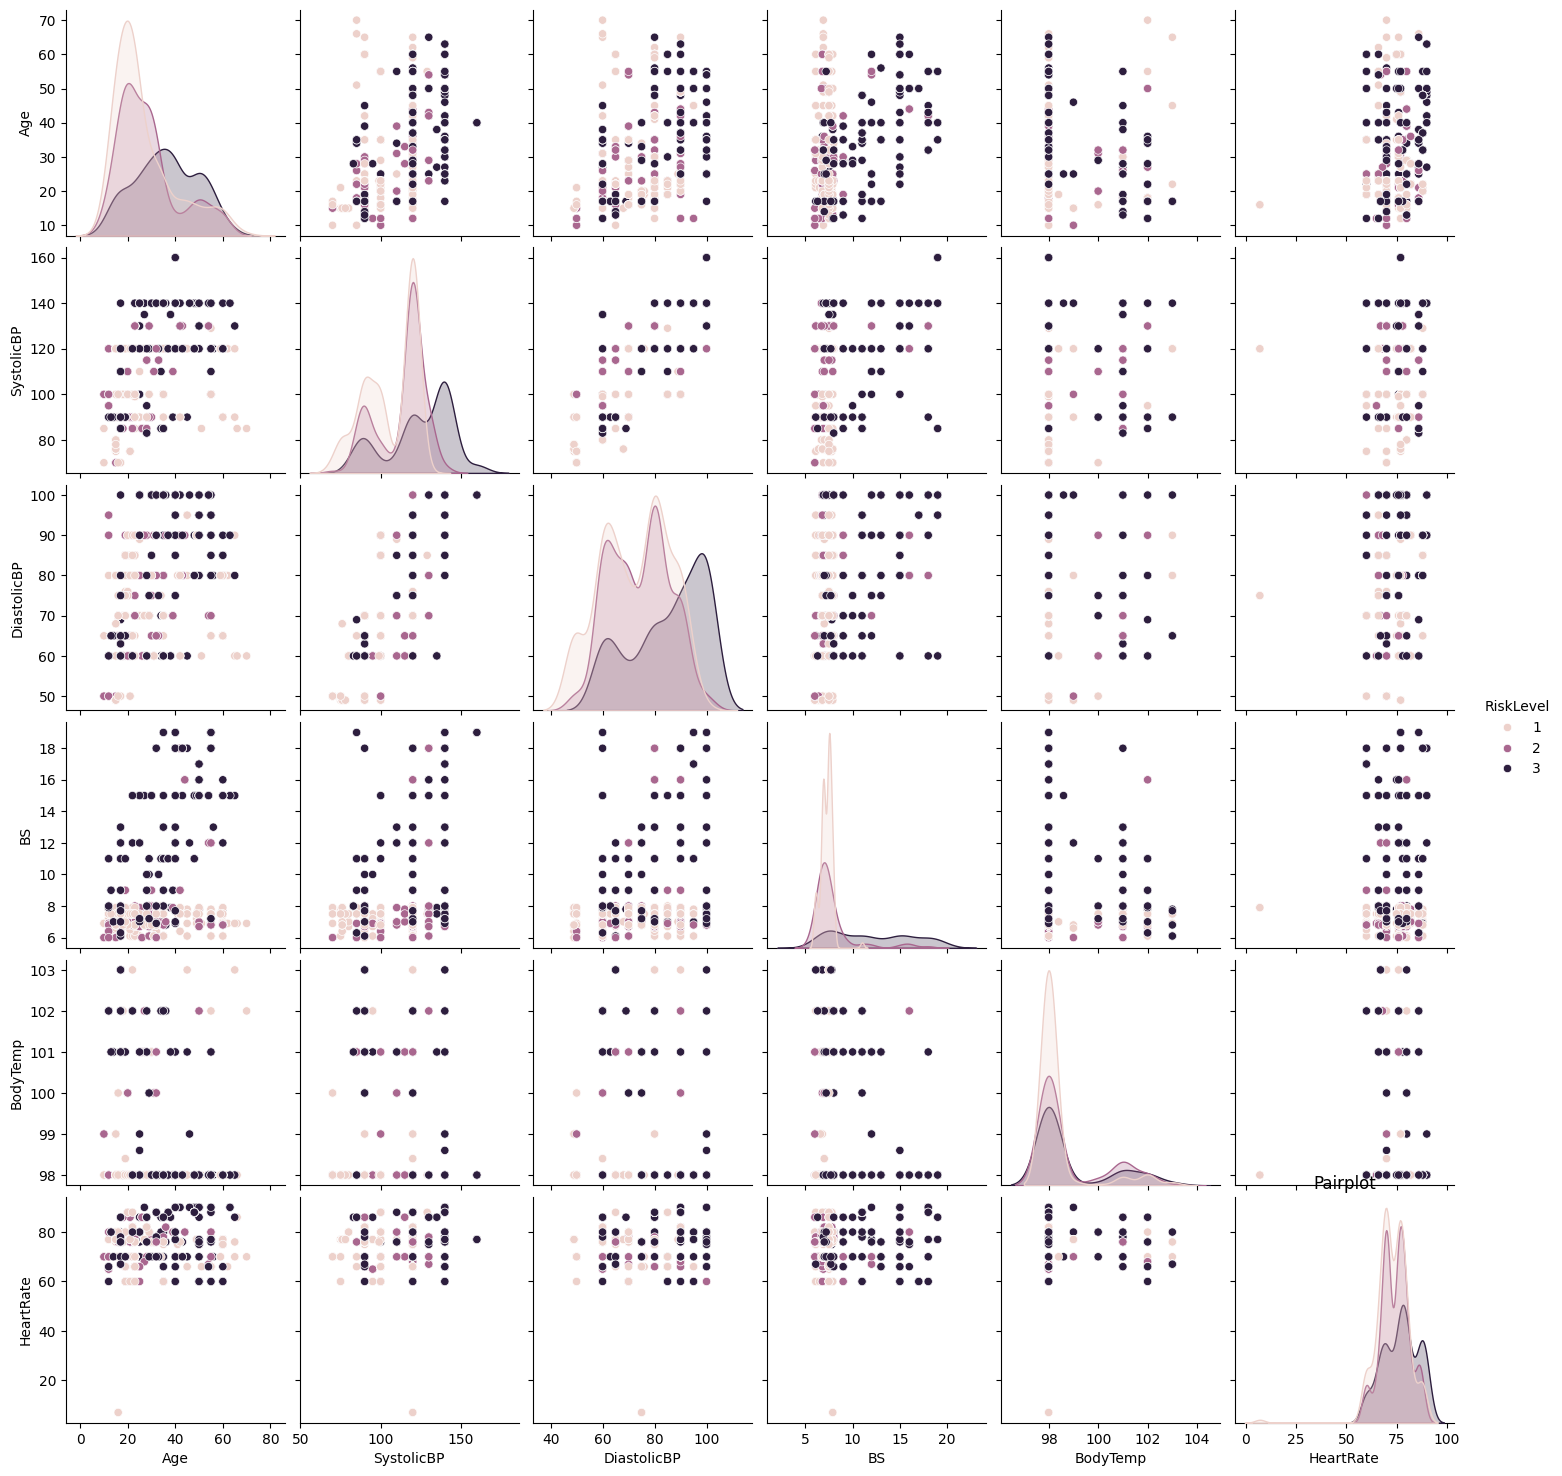

In [9]:
sns.pairplot(df,hue='RiskLevel')
plt.title('Pairplot')
plt.show()

In [10]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

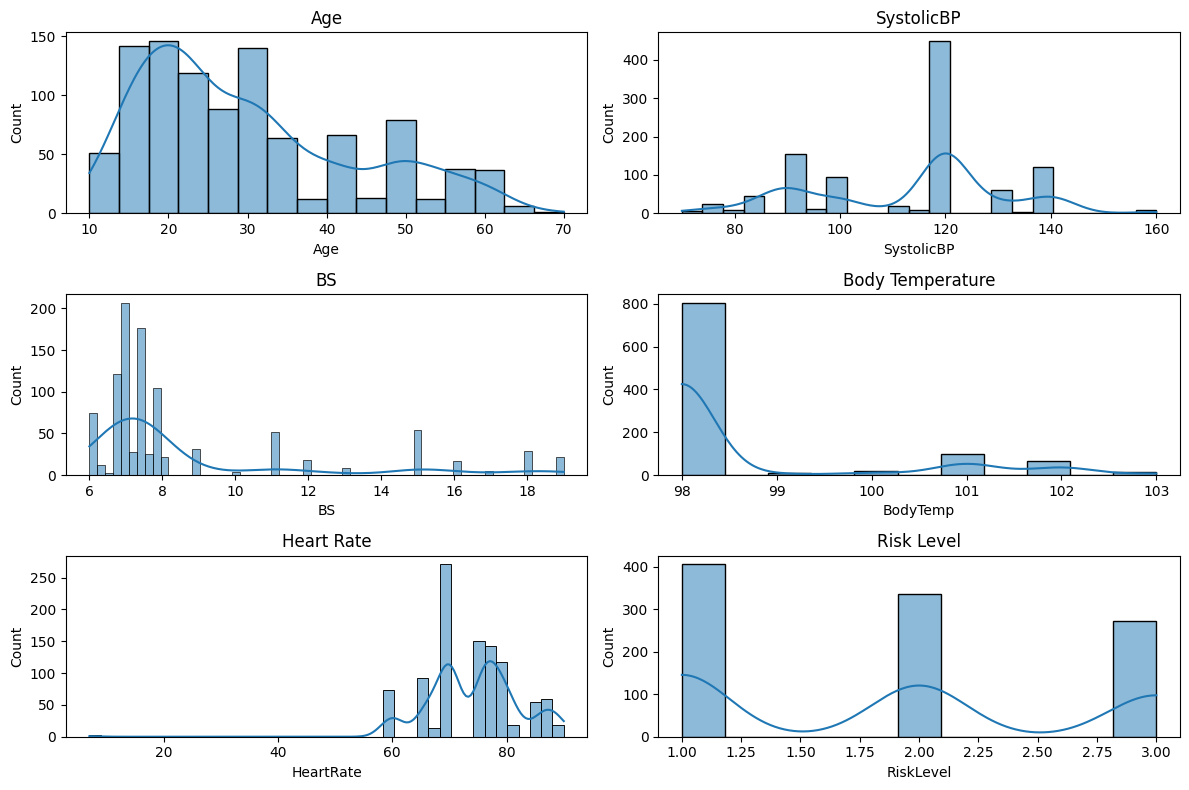

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
sns.histplot(df['Age'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age')
sns.histplot(df['SystolicBP'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('SystolicBP')
sns.histplot(df['BS'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('BS')
sns.histplot(df['BodyTemp'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Body Temperature')
sns.histplot(df['HeartRate'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Heart Rate')
sns.histplot(df['RiskLevel'], kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Risk Level')
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame containing the data

# Feature Selection
X = df.drop(columns=['RiskLevel'])
y = df['RiskLevel']

# Encoding target variable y
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the deep learning model for classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model for classification
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=35, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/35
21/21 [==============================] - 2s 17ms/step - loss: 1.0730 - accuracy: 0.3627 - val_loss: 0.9764 - val_accuracy: 0.4785
Epoch 2/35
21/21 [==============================] - 0s 6ms/step - loss: 0.9250 - accuracy: 0.6296 - val_loss: 0.8998 - val_accuracy: 0.6012
Epoch 3/35
21/21 [==============================] - 0s 5ms/step - loss: 0.8489 - accuracy: 0.6759 - val_loss: 0.8466 - val_accuracy: 0.6012
Epoch 4/35
21/21 [==============================] - 0s 3ms/step - loss: 0.7953 - accuracy: 0.6898 - val_loss: 0.8059 - val_accuracy: 0.5890
Epoch 5/35
21/21 [==============================] - 0s 4ms/step - loss: 0.7590 - accuracy: 0.7052 - val_loss: 0.7791 - val_accuracy: 0.6196
Epoch 6/35
21/21 [==============================] - 0s 4ms/step - loss: 0.7329 - accuracy: 0.7006 - val_loss: 0.7583 - val_accuracy: 0.6442
Epoch 7/35
21/21 [==============================] - 0s 4ms/step - loss: 0.7141 - accuracy: 0.7099 - val_loss: 0.7412 - val_accuracy: 0.6564
Epoch 8/35
21/21 [=

In [15]:
# Predicting for new values
new_data = pd.DataFrame({
    'Age': [30, 35, 25],
    'SystolicBP': [120, 140, 130],
    'DiastolicBP': [80, 90, 70],
    'BS': [6.9, 7.2, 6.5],
    'BodyTemp': [98, 98.2, 98.1],
    'HeartRate': [70, 75, 80]  # Placeholder values for HeartRate
})

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict using the model
predictions = model.predict(new_data_scaled)
predicted_classes = np.argmax(predictions, axis=1)
print("Predicted Classes:", predicted_classes)


1/1 [==============================] - 0s 195ms/step
Predicted Classes: [0 2 1]
